# Project 2: Automobile

# Submitted by : Kamal Pratap Singh

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Autodata.csv")

In [10]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.shape

(205, 25)

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### So there 205 rows and 25 columns in the Dataset, in which 15 columns are Numerical and 10 columns are Categorical. 

In [13]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### There is no Null Values Present in any Columns

In [14]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###  Seperate the Categorical and Numerical Column

In [15]:
Numeric = []
Catagorical = []
for i in df.columns:
    if df[i].dtypes == 'int64'or df[i].dtypes == 'float64':
        Numeric.append(i)
    else:
        Catagorical.append(i)
    

In [16]:
# Numerical Variables
Numeric

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [17]:
# catagorical Variables
Catagorical

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [18]:
# Outlier Analysis

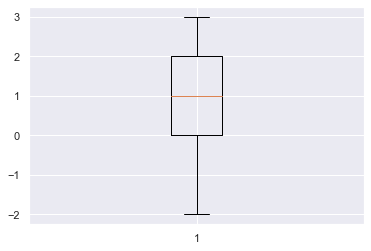

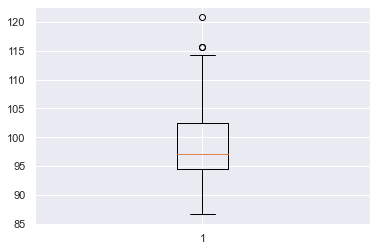

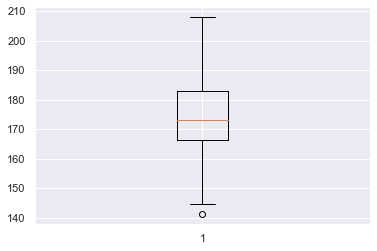

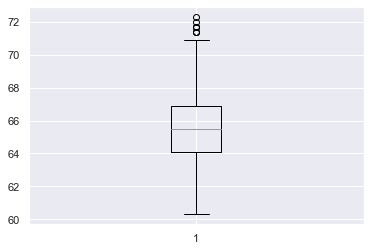

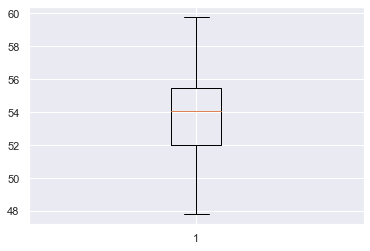

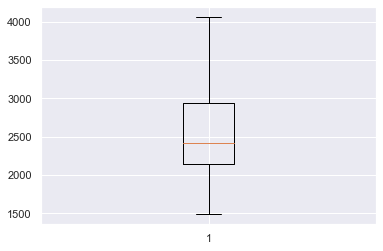

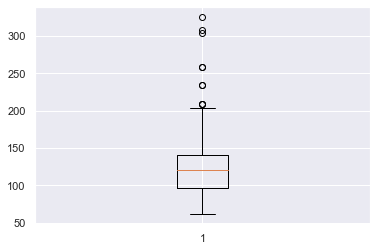

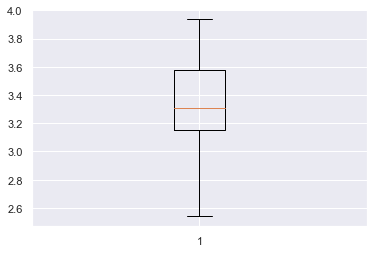

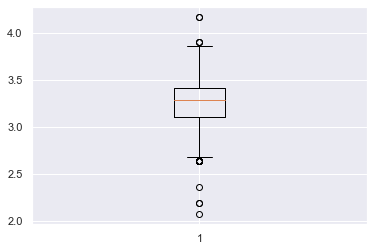

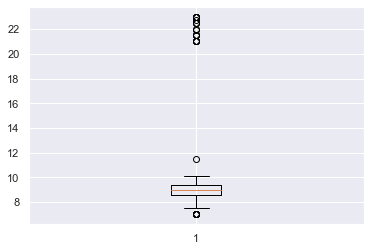

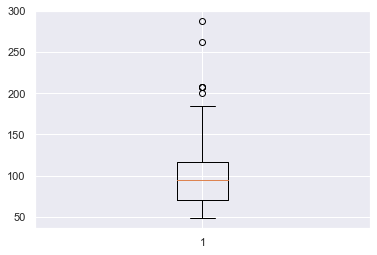

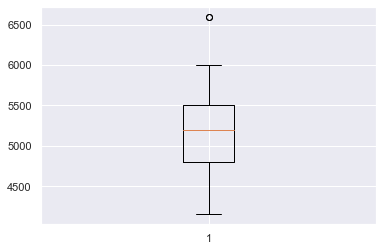

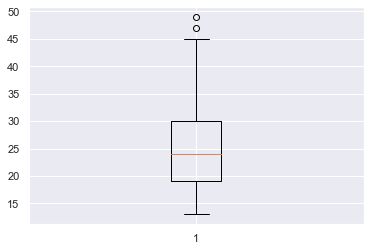

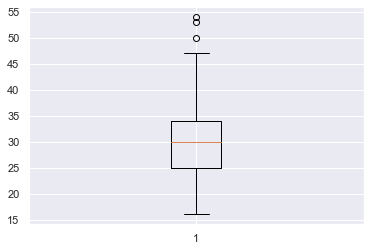

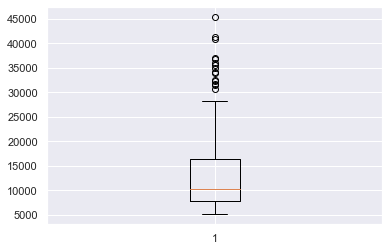

In [19]:
sns.set()
for i in Numeric:
    plt.boxplot(x = df[i])
    plt.show()

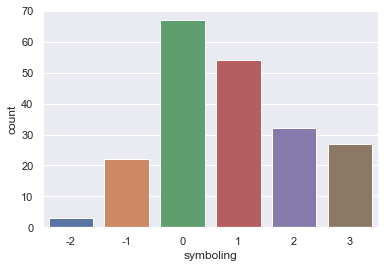

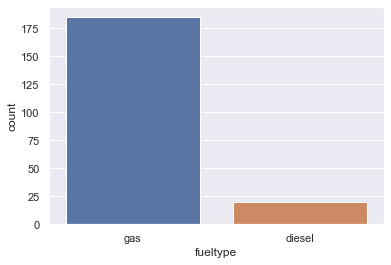

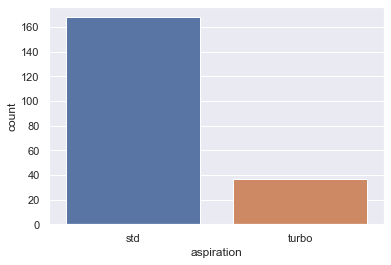

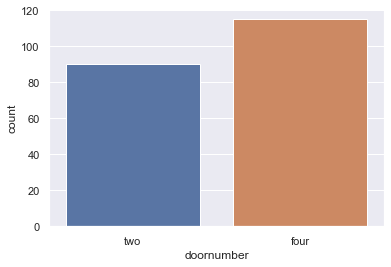

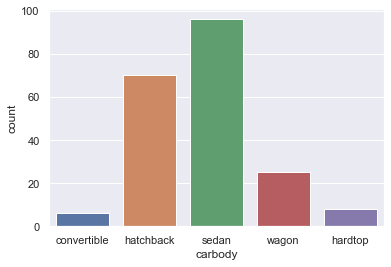

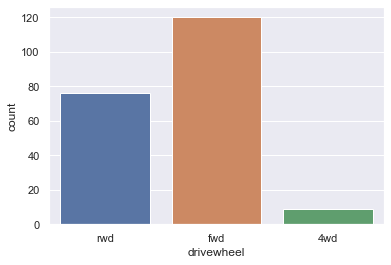

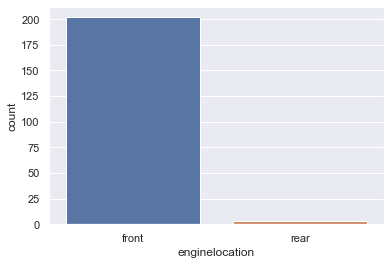

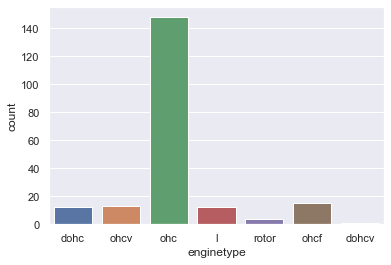

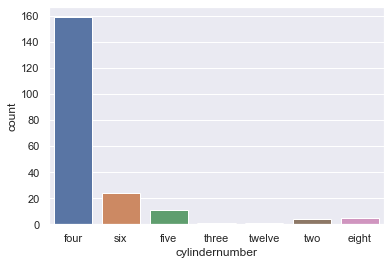

In [20]:
for i in df.columns:
    if df[i].nunique()<8:
        sns.countplot(x = df[i])
        plt.show()

### To show the price is Distributed

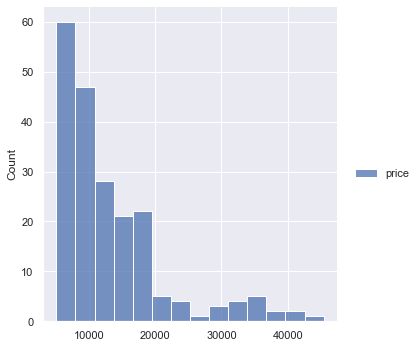

In [21]:
sns.displot([df['price']])

In [22]:
# Creating different DataFrame Of Catagorical Column
dfcat = df.loc[:,Catagorical]
dfcat.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [23]:
# Creating Different DataFrame of Numerical Column
dfnum = df.loc[:,Numeric]
dfnum.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
print("Total Number of Car making Company:",dfcat['make'].nunique())

Total Number of Car making Company: 147


In [25]:
dfcat.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [26]:
dfcat.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [27]:
print('Avg Price of gas driver car:',df[df.fueltype == 'gas'].price.mean())
print('Avg Price of Diesel driven cars:',df[df.fueltype == 'diesel'].price.mean())

Avg Price of gas driver car: 12999.7982
Avg Price of Diesel driven cars: 15838.15


In [28]:
print('Avg Price of cars with engine location front:',df[df.enginelocation == 'front'].price.mean())
print('Avg Price of cars with engine location rear:',df[df.enginelocation == 'rear'].price.mean())

Avg Price of cars with engine location front: 12961.097361386139
Avg Price of cars with engine location rear: 34528.0


<AxesSubplot:>

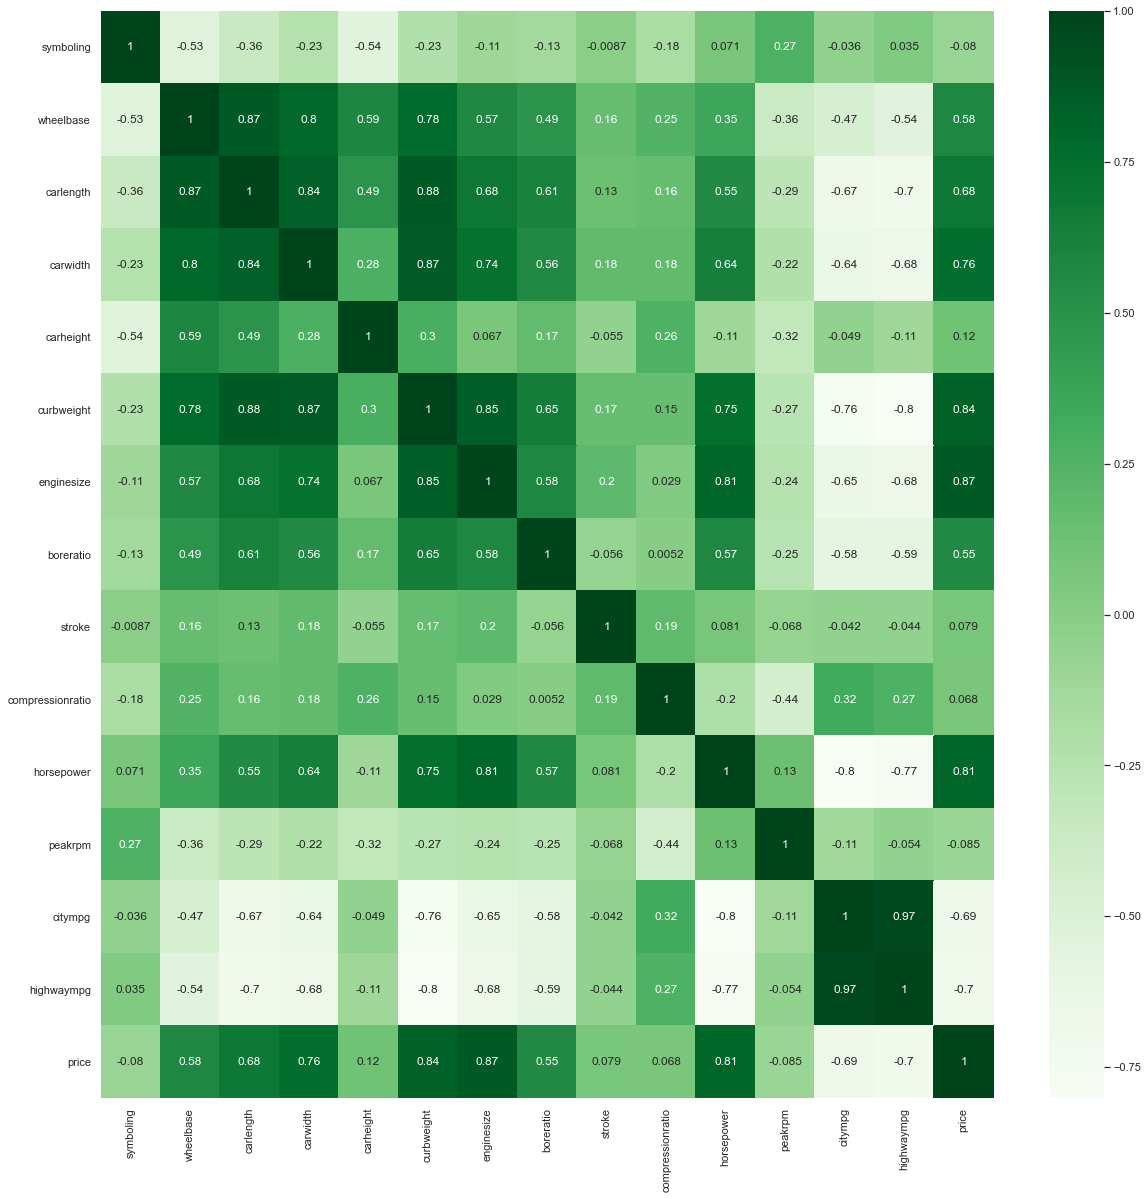

In [29]:
# Identifying the best Independent Variable on the basis of correlation with the target variable.
plt.figure(figsize = (20,20))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap = 'Greens')

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
le = LabelEncoder()
df1 = df.apply(le.fit_transform)
df1

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,2,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,118
1,5,3,1,0,1,0,2,0,2,22,...,18,5,23,4,13,30,10,8,10,137
2,3,1,1,0,1,2,2,0,10,29,...,28,5,1,28,13,45,10,6,9,137
3,4,4,1,0,0,3,1,0,30,45,...,11,5,13,25,22,27,16,11,13,123
4,4,5,1,0,0,3,0,0,28,45,...,22,5,13,25,5,33,16,5,5,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,139,1,0,0,3,2,0,46,63,...,24,5,35,15,20,32,15,10,11,143
201,1,138,1,1,0,3,2,0,46,63,...,24,5,35,15,11,48,14,6,8,161
202,1,140,1,0,0,3,2,0,46,63,...,33,5,26,7,12,38,16,5,6,165
203,1,142,0,1,0,3,2,0,46,63,...,25,3,6,25,31,28,8,13,10,167


<AxesSubplot:>

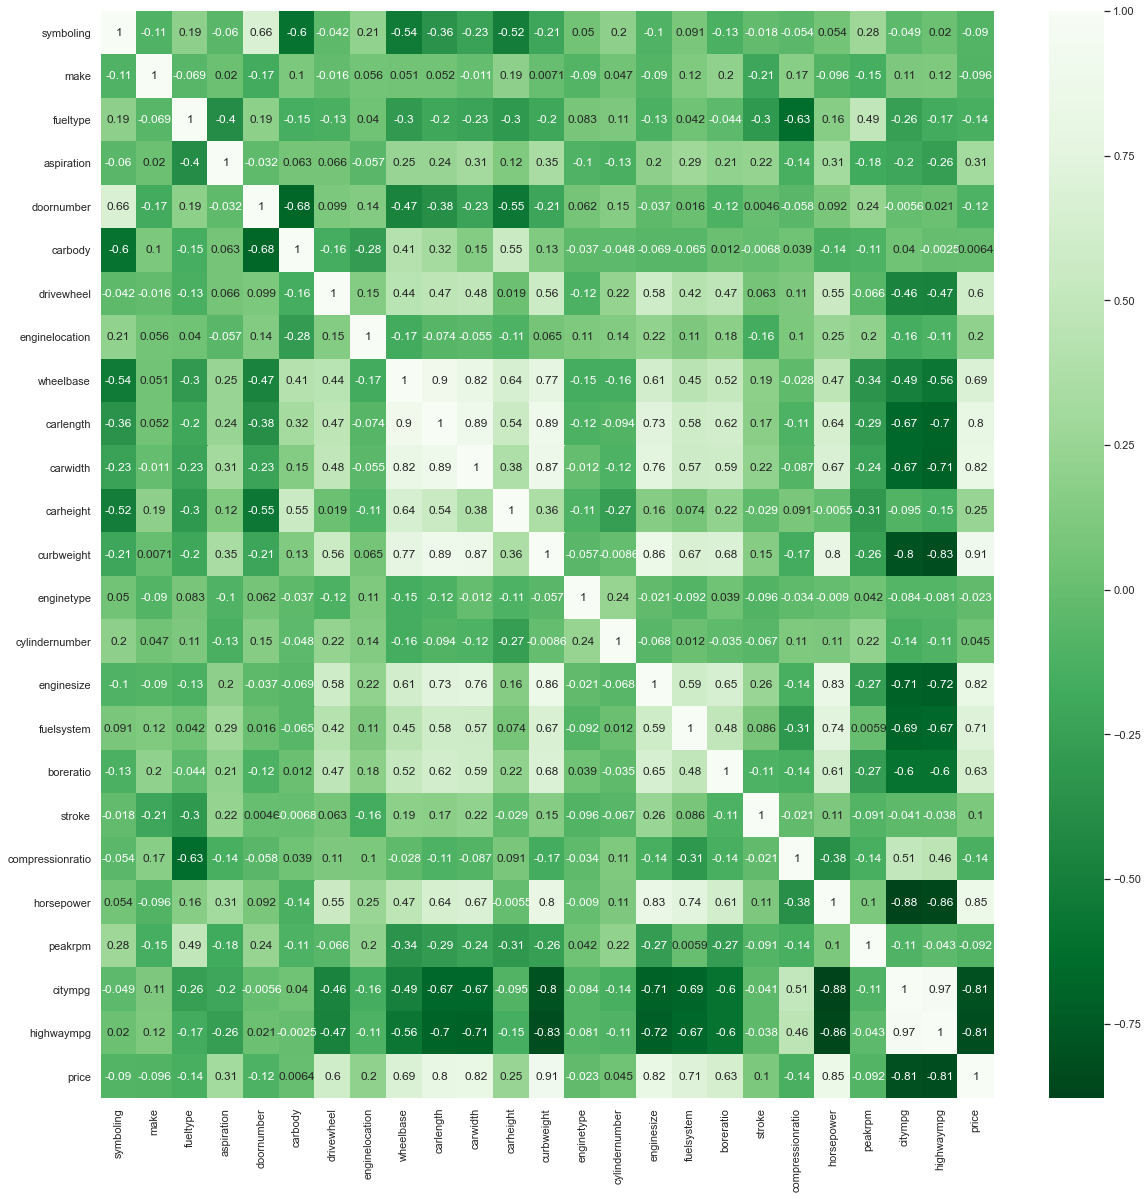

In [32]:
plt.figure(figsize=(20,20))
corr = df1.corr()
sns.heatmap(corr,annot = True,cmap = 'Greens_r')

In [33]:
# Assigning the independent and target variable

In [34]:
x_bar = df1.iloc[:,:-1]
y_bar = df1['price']

In [35]:
from sklearn.ensemble import ExtraTreesRegressor

In [36]:
# Create Model
model=ExtraTreesRegressor()
model.fit(x_bar, y_bar)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.00650743 0.01586259 0.00105863 0.00354636 0.00240226 0.01057035
 0.03736557 0.00193858 0.02220175 0.03197975 0.08439401 0.00552608
 0.27022443 0.00309207 0.00544554 0.05767235 0.14409567 0.00604751
 0.0059218  0.00496956 0.14972167 0.00779414 0.05906094 0.06260097]


In [38]:
df1.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### As we see enginesize ,curbweight and horsepower are the most influence Varaibles

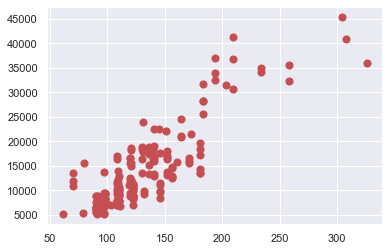

In [39]:
plt.scatter( df['enginesize'],df['price'], color = 'r',s = 50)

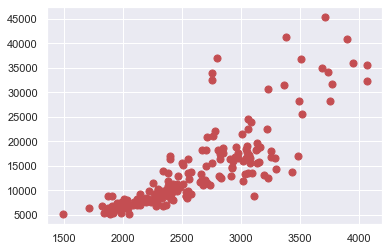

In [40]:
plt.scatter(df['curbweight'],df['price'],color = 'r',s = 50)

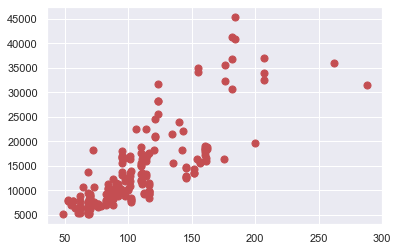

In [41]:
plt.scatter(df['horsepower'],df['price'],color='r',s = 50)

In [42]:
# Using enginesize as Independent Variable

In [43]:
x1 = df.loc[:,['enginesize']]
y1 = df.loc[:,['price']]

In [44]:
# performing train test split
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size=0.2,random_state=101)

In [45]:
lr = LinearRegression()

In [46]:
model1 = lr.fit(X_train,Y_train)

In [47]:
y_pred1 = model1.predict(X_test)

In [48]:
model1.score(X_test,Y_test)

0.7702629120214554

In [49]:
model1.intercept_

array([-7941.71780934])

In [50]:
model1.coef_

array([[168.50940515]])

In [51]:
len(y_pred1)

41

In [52]:
# Using Curbweight as Independent Variable

In [53]:
x2 = df.loc[:,['curbweight']]
y2 = df.loc[:,['price']]

In [54]:
# performing train_test split
X_train,X_test,Y_train,Y_test = train_test_split(x2,y2,test_size = 0.2,random_state=101)

In [55]:
model2 = lr.fit(X_train,Y_train)

In [56]:
y_pred2 = model2.predict(X_test)

In [57]:
len(y_pred2)

41

In [58]:
# Using horsepower as Independent Variable
x3 = df.loc[:,['horsepower']]
y3 = df.loc[:,['price']]

In [59]:
# performing train_test split
X_train,X_test,Y_train,Y_test = train_test_split(x3,y3,test_size = 0.2,random_state = 101)

In [60]:
model3 = lr.fit(X_train,Y_train)

In [61]:
y_pred3 = model3.predict(X_test)

In [62]:
len(y_pred3)

41

In [63]:
# Error Calculation
mse1 = mean_squared_error(Y_test,y_pred1)
mae1 = mean_absolute_error(Y_test,y_pred1)

In [64]:
from math import sqrt

In [65]:
print('mean_squared_error', round(mse1,2))
print('Root mean squared error',round(sqrt(mse1),2))
print('mean absolute error',round(mae1,2))

mean_squared_error 7697198.79
Root mean squared error 2774.38
mean absolute error 1985.62


In [79]:
def mape(Y_test,y_pred):
    new = (Y_test - y_pred)/Y_test
    ab = abs(new)
    return f'mape score of: { round(ab.mean(),2)*100}'

In [80]:
# calculate mean absolute error
mape(Y_test,y_pred1)

'mape score of: price    21.0\ndtype: float64'

In [81]:
mape(Y_test,y_pred2)

'mape score of: price    20.0\ndtype: float64'

In [82]:
mape(Y_test,y_pred3)

'mape score of: price    25.0\ndtype: float64'

###  As we  can see second model that is pridiction based on curbweight has less error so we select that

In [83]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [84]:
from sklearn.metrics import r2_score

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(x2,y2,test_size = 0.2,random_state = 101)

In [86]:
r_score = r2_score(Y_test,y_pred2)

In [87]:
print('The R square value of the model is',r_score)

The R square value of the model is 0.7733052439214944


## Multiple Linear Regression 

<AxesSubplot:>

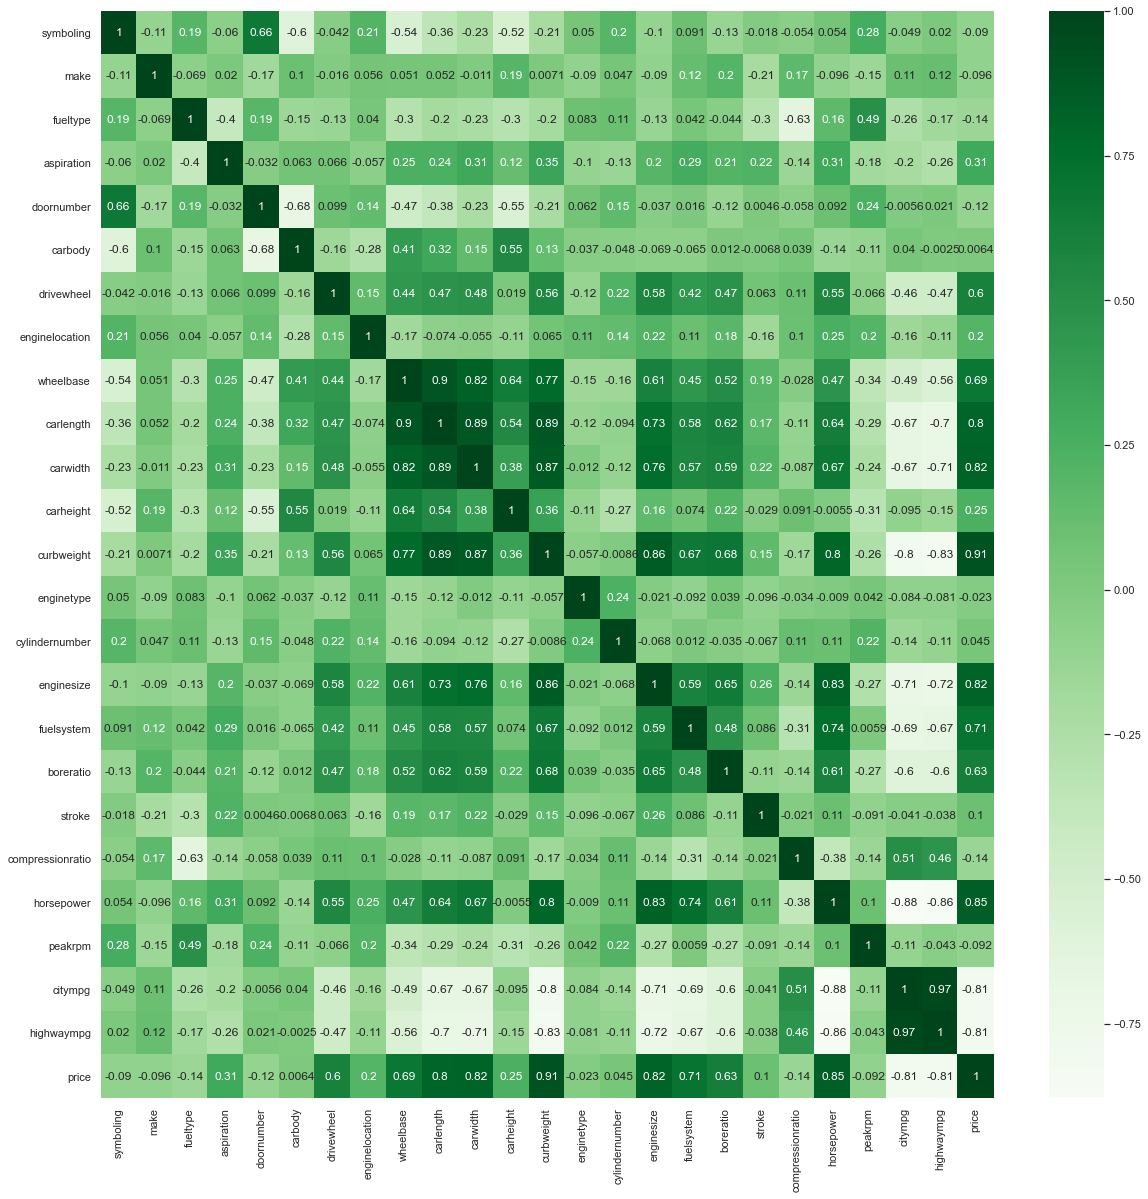

In [91]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(),annot = True,cmap = 'Greens')

In [95]:
# features Selection
mode = ExtraTreesRegressor
model.fit(x_bar,y_bar)

ExtraTreesRegressor()

In [98]:
print(model.feature_importances_)

[0.00361583 0.01900399 0.00076104 0.00457576 0.00233442 0.00993189
 0.03860975 0.00217218 0.02001577 0.04760626 0.04451617 0.0059539
 0.28334957 0.00245446 0.00308003 0.0713245  0.14089189 0.00601895
 0.00563889 0.00357092 0.08062634 0.00852594 0.07982314 0.11559841]


In [100]:
df1.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

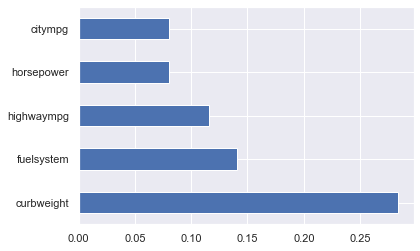

In [107]:
imp_feature = pd.Series(model.feature_importances_,index = df1.iloc[:,:-1].columns)
imp_feature.nlargest(5).plot(kind = 'barh')
plt.show()

In [108]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [110]:
# from both we find out 'curbweight','enginesize','horsepower' are the most influence varaible
x = df.loc[:,['curbweight','horsepower','enginesize']]
y = df.loc[:,['price']]

In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [112]:
X_train

,curbweight,horsepower,enginesize
154,2290,62,92
74,3715,184,304
179,3016,161,171
118,1918,68,90
16,3380,182,209
...,...,...,...
63,2443,64,122
70,3770,123,183
81,2328,88,122
11,2395,101,108


In [113]:
model = lr.fit(X_train,Y_train)

In [114]:
y_pred = lr.predict(X_test)

In [115]:
#prediction
y_pred

array([[ 5849.79619064],
       [ 9389.72979011],
       [22266.81878943],
       [ 9002.8077008 ],
       [15259.36375075],
       [23069.35298895],
       [13767.45534824],
       [ 6164.20888899],
       [ 9628.57835181],
       [ 6394.84691622],
       [11939.14295763],
       [15795.51849243],
       [ 6175.31973726],
       [ 5904.92241604],
       [12531.3538048 ],
       [12879.96338928],
       [11293.96515037],
       [11340.27757765],
       [ 5815.32630149],
       [ 6286.8811359 ],
       [10609.19183964],
       [11389.58652841],
       [ 7025.89294818],
       [ 5862.39021342],
       [15541.35501065],
       [34630.333052  ],
       [ 5608.58556463],
       [ 8208.91050605],
       [ 6852.52478567],
       [ 9878.56376743],
       [ 5942.8578952 ],
       [ 7649.81634539],
       [19596.07768716],
       [19252.71074248],
       [18045.67111221],
       [17136.68448134],
       [ 6511.07524233],
       [ 5464.85913998],
       [11333.85184952],
       [ 9916.22362043],


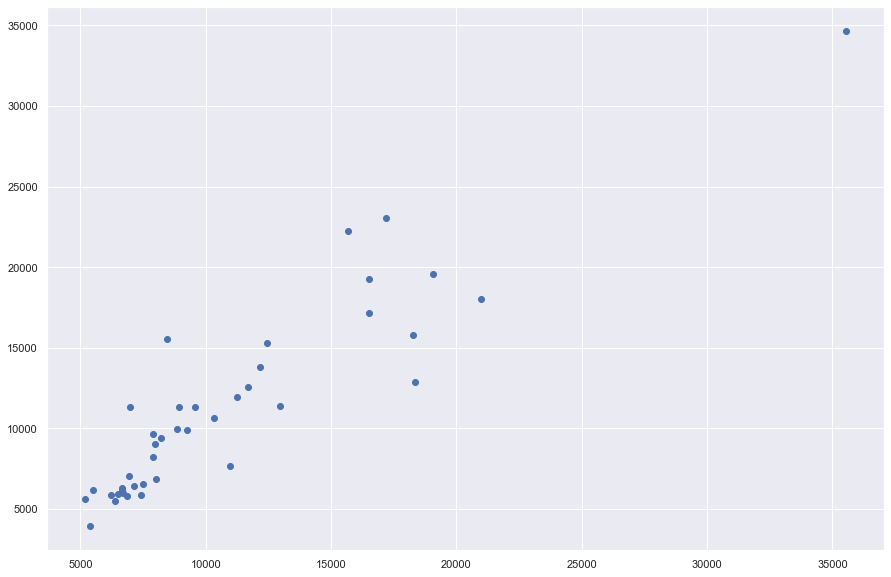

In [118]:
plt.figure(figsize = (15,10))
plt.scatter(Y_test,y_pred)

##  here we can see some linear pattern between y_test and y_train

In [121]:
# Error Calculation
mape(Y_test,y_pred)

'mape score of: price    17.0\ndtype: float64'

In [123]:
# R-score_value
r_score = r2_score(Y_test,y_pred)
print('the r square value of the model:',r_score)

the r square value of the model: 0.8161258178252899
